In [1]:
# OPTIONAL: Load the "autoreload" eX_orig[alias]tension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

In [2]:

import matplotlib

import pandas as pd
import pickle as pkl
import numpy as np
import collections as cx
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from src.visualization.plots import gene_sample_frequency_change_heatmap, psuedocontrolcomparisonplot
from src.config import get_interim_dir, get_experiment_artifacts
from skbio.stats.composition import clr

In [3]:
psuedo_controls = pd.read_csv("{}/psuedo_controls.txt".format(get_experiment_artifacts()))["0"].values
psuedo_controls

array(['Gnas', 'Cdc14a', 'Espn', 'Speg', 'Slc4a8', 'Tmcc2',
       '4930404N11Rik', 'Cyp2t4', 'Wipi1', 'Mbp', 'Dlgap4', 'Cdh23',
       'Cd248', 'Gltpd2', 'Xylt1', 'Zfp629', 'Oxct2a', 'Foxa2', 'Mapk11',
       'Qsox1', 'Ndn', 'Pip4p1', 'Epha10', 'Adamts1', 'Cacna2d1',
       'Tspan1', 'Asprv1', 'Runx3', 'Rgs3', 'Emp3', 'Uncx', 'Gp2',
       'Tmem94', 'Prr18', 'Prr16', 'Bace2', 'Cyb561a3', 'Zfp64', 'Rai2',
       'Dnd1', 'Kdf1', 'Prr23a3', 'Mageh1', 'Xxylt1', 'Phlpp1', 'Unkl',
       'Prss55', 'Col6a2', 'Nmur2', 'Sprn', 'Gtpbp10', 'Siah2', 'Eps8l3',
       'Prickle3', 'Il1rapl2', 'Garem2', 'Ccser2', 'Mmp28', 'Apcdd1',
       'Yod1', 'Tedc1', 'Ptchd4', 'Abhd13', 'Adgrv1', 'Accsl', 'Pik3ip1',
       'Insrr', 'Irak4', 'Bst1', 'Man1b1', 'Plcb4', 'Sptb', 'Dnah1',
       'Fgf16', 'S1pr2', 'Gpr26', 'Gata2', 'Abcg1', 'Stac3', 'Gpatch3',
       'Uts2', 'Aldh6a1', 'Znrf1', 'Cpe', 'Trpc6', 'P4htm',
       'E030030I06Rik', 'Tmem114', 'Htra4', 'Ngfr', 'Igsf8', 'Fhad1',
       'Mob3b', 'Cnot6', 'Wfdc

In [4]:
outlier_details_df = pd.read_pickle(get_experiment_artifacts() + "augmented_with_GO_outlier_results.pkl")
outlier_details_df

Sample               T1                                          T2  \
Measure         pvalues  distances reject pvals_corrected   pvalues   
Gene                                                                  
0610009B22Rik  0.999409   0.169394  False             1.0  0.733467   
0610010K14Rik  0.922053   1.420544  False             1.0  0.731721   
0610030E20Rik  0.151195   8.092794  False             1.0  0.684153   
0610040J01Rik  0.027328  12.609331  False             1.0  0.233254   
1110004F10Rik  0.096137   9.343101  False             1.0  0.283318   
...                 ...        ...    ...             ...       ...   
Znhit1              NaN        NaN    NaN             NaN  0.019401   
Zranb2              NaN        NaN    NaN             NaN  0.033617   
Zrsr1               NaN        NaN    NaN             NaN  0.400979   
Zup1                NaN        NaN    NaN             NaN  0.116112   
Zwilch              NaN        NaN    NaN             NaN  0.372210   

Sample                                                 T3             ...  \
Measure        distances reject pvals_corrected   pvalues  distances  ...   
Gene                                                                  ...   
0610009B22Rik   2.782549  False             1.0  0.285746   6.216204  ...   
0610010K14Rik   2.793915  False             1.0  0.719508   2.873326  ...   
0610030E20Rik   3.102720  False             1.0  0.582856   3.770852  ...   
0610040J01Rik   6.834351  False             1.0  0.011093  14.834562  ...   
1110004F10Rik   6.242655  False             1.0  0.049288  11.107589  ...   
...                  ...    ...             ...       ...        ...  ...   
Znhit1         13.463578  False             1.0  0.104430   9.118505  ...   
Zranb2         12.086810  False             1.0  0.002038  18.863191  ...   
Zrsr1           5.123631  False             1.0  0.048081  11.171662  ...   
Zup1            8.828292  False             1.0  0.489804   4.426300  ...   
Zwilch          5.371785  False             1.0  0.027922  12.555339  ...   

Sample                  Global                                                \
Measure       Mean Consistency Mean Std Consistency Mean Std CLR Consistency   
Gene                                                                           
0610009B22Rik        -0.321429            -1.033726                -0.865369   
0610010K14Rik         0.404762             0.720810                -0.067222   
0610030E20Rik         0.071429            -0.067081                -0.088580   
0610040J01Rik         0.107143             0.012746                -0.291637   
1110004F10Rik        -0.178571            -0.658782                -0.194118   
...                        ...                  ...                      ...   
Znhit1                0.160714             0.157694                 0.801511   
Zranb2                0.089286            -0.018038                 0.541765   
Zrsr1                -0.267857            -0.844826                -1.187440   
Zup1                 -0.125000            -0.514742                -0.513727   
Zwilch                0.071429            -0.055662                -0.719731   

Sample               Gene Sets                                      \
Measure       Reject   Adamson GeneSubset2 GeneSubsetSD30 Outliers   
Gene                                                                 
0610009B22Rik    0.0     False       False          False    False   
0610010K14Rik    0.0     False       False          False    False   
0610030E20Rik    0.0     False       False          False    False   
0610040J01Rik    0.0     False       False          False    False   
1110004F10Rik    0.0     False       False          False    False   
...              ...       ...         ...            ...      ...   
Znhit1           0.0      True       False          False    False   
Zranb2           0.0     False       False          False    False   
Zrsr1            0.0     False     

In [5]:
X_imputed = pd.read_pickle(get_experiment_artifacts() + "imputed_sample_data.pkl")
print(X_imputed.keys())
print("Data Ready.")

dict_keys(['T1', 'T2', 'T3'])
Data Ready.


In [6]:
df = pd.concat(X_imputed.values(), keys=X_imputed.keys(), names=["Sample"])
print(df.shape)

outliers_df = df[df.index.get_level_values("Gene").isin(outlier_details_df.index)]
print(outliers_df.shape)

psudo_control_df = df.loc[df.index.get_level_values("Gene").isin(psuedo_controls), :]
psudo_control_gmean_df = pd.DataFrame(psudo_control_df.groupby("Sample").apply(stats.gmean).values.tolist(), index=X_imputed.keys(), columns=df.columns)
psudo_control_gmean_df.index.name="Sample"
psudo_control_gmean_df

psudo_control_gmean_df = psudo_control_gmean_df.div(psudo_control_gmean_df.sum(axis=1), axis=0)

print(psudo_control_gmean_df.shape)

change_df = outliers_df - psudo_control_gmean_df
change_df
print(change_df.shape)

(52400, 7)
(52400, 7)
(3, 7)
(52400, 7)


In [7]:
clr_change_df = {}

for a in X_imputed.keys():
    clrcdf = outliers_df.loc[a, :] .dropna(axis=1)
    clrcdf = pd.DataFrame(clr(clrcdf), index=clrcdf.index, columns=clrcdf.columns)
    clr_change_df[a] = (clrcdf - clr(psudo_control_gmean_df.loc[a, :].dropna()))

clr_change_df = pd.concat(clr_change_df)

# Top Outlying Genes

First, take genes which are consistent:

In [9]:
outs = outlier_details_df.sort_values(by=("Global", "Mean Score"), ascending=False)["Global"]
outs

Measure,Max Score,Mean Score,Mean Consistency,Mean Std Consistency,Mean Std CLR Consistency,Reject,isGODSBRepair,isGORepair
Gene,,,,,,,,
Atp6v1g1,82.696809,50.230998,0.285714,0.441392,0.625735,2.0,False,False
H2ac18,51.258007,29.070074,0.160714,0.151385,0.627694,2.0,False,False
Metap2,30.121151,21.587978,0.696429,1.400330,1.133468,2.0,False,False
Xrcc5,28.203567,20.004195,0.803571,1.652011,1.094423,2.0,True,True
H2ax,24.280820,19.870028,0.880952,1.846380,1.771403,3.0,True,True
...,...,...,...,...,...,...,...,...
Tmcc2,-0.639861,-0.680629,-0.666667,-1.831361,-1.349514,0.0,False,False
Speg,-0.666418,-0.691945,-0.404762,-1.191015,-0.709006,0.0,False,False
Espn,-0.680252,-0.708280,0.488095,0.902457,0.865257,0.0,False,False


/Users/colm/repos/MUSICian/notebooks/exploratory/outlier_analysis/plots.py:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  if counts is not None:


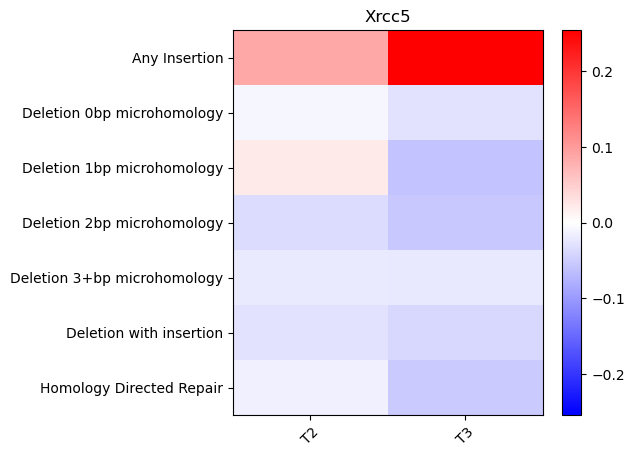

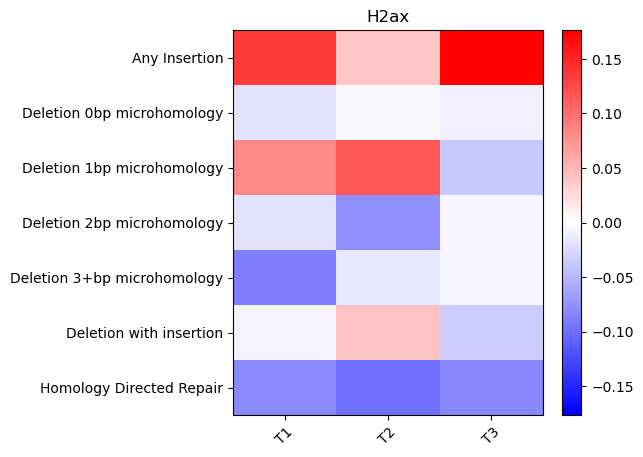

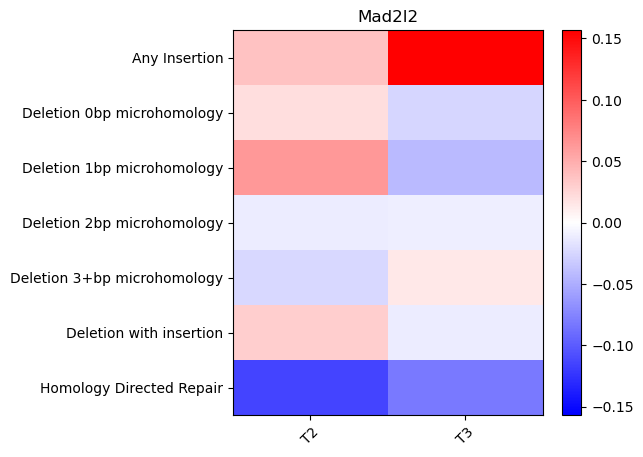

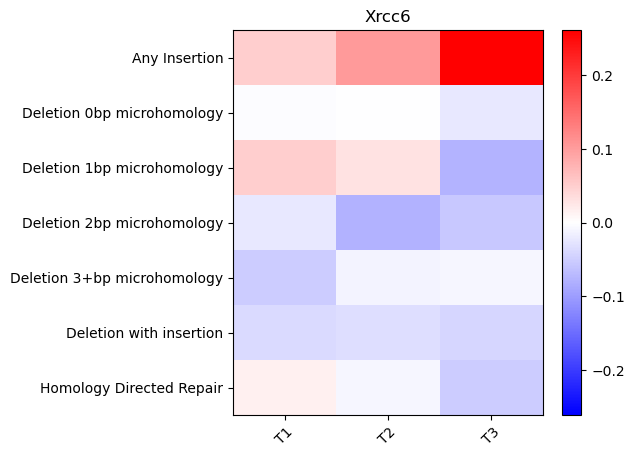

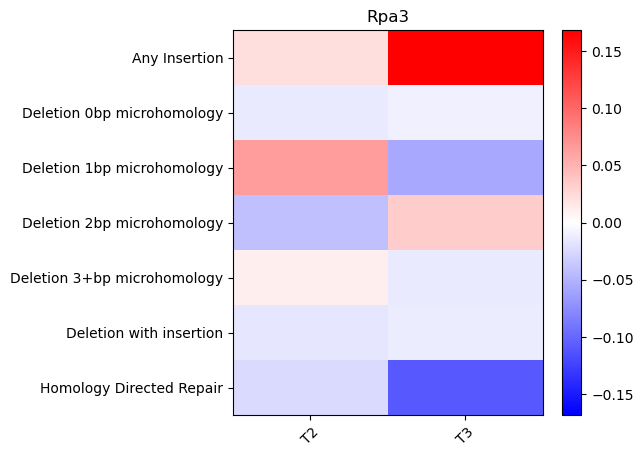

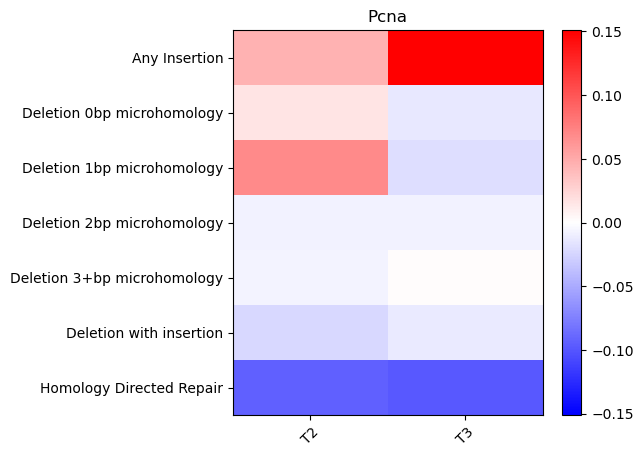

In [14]:
top_genes = outs[outs["isGORepair"]].index.to_series()[:6]

for gene_to_vis in top_genes:
    gene_sample_frequency_change_heatmap(change_df, gene_to_vis)
    plt.show()

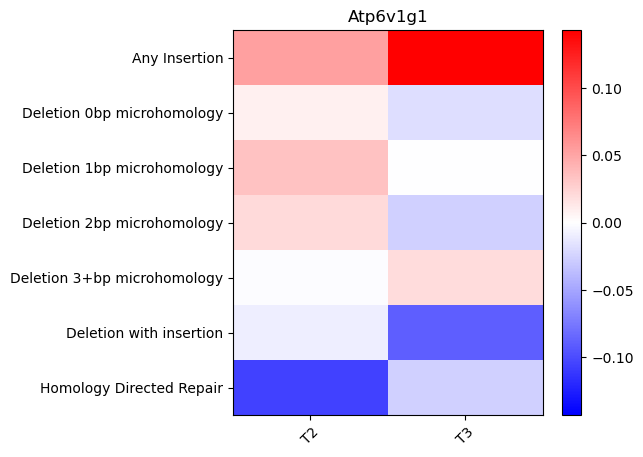

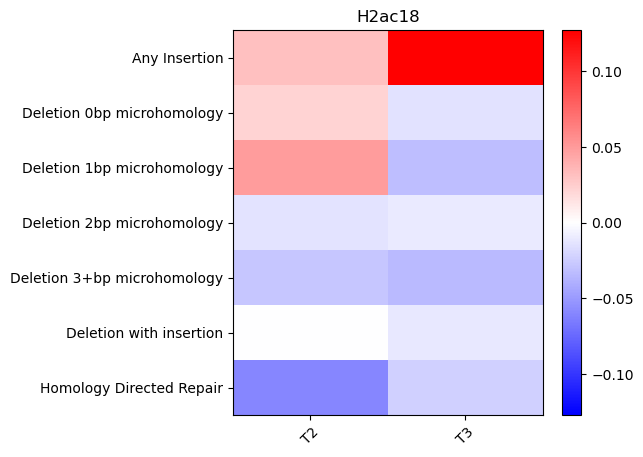

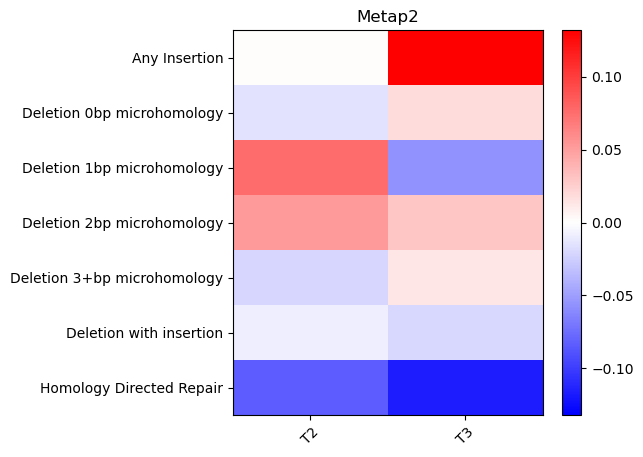

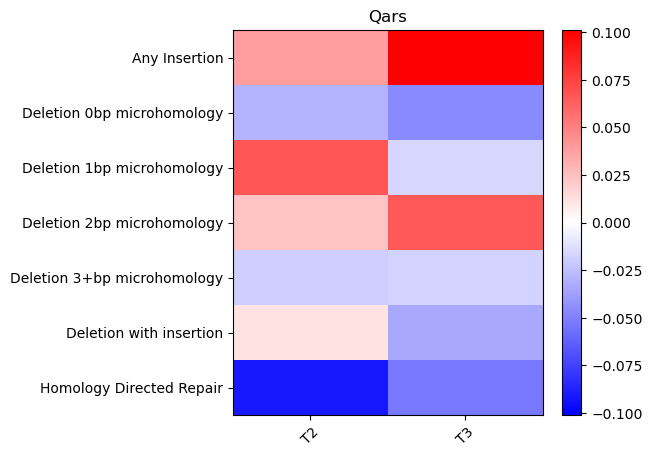

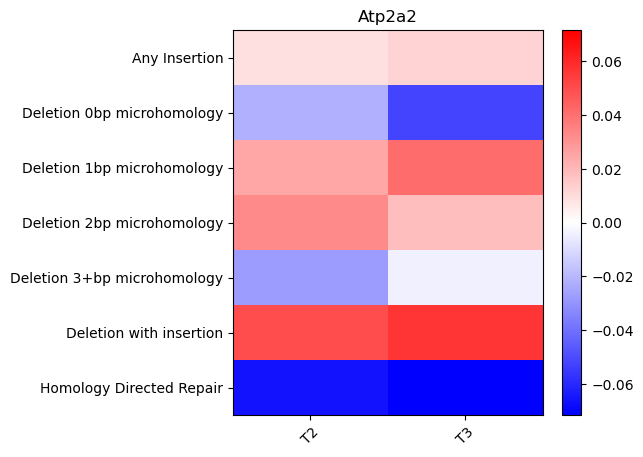

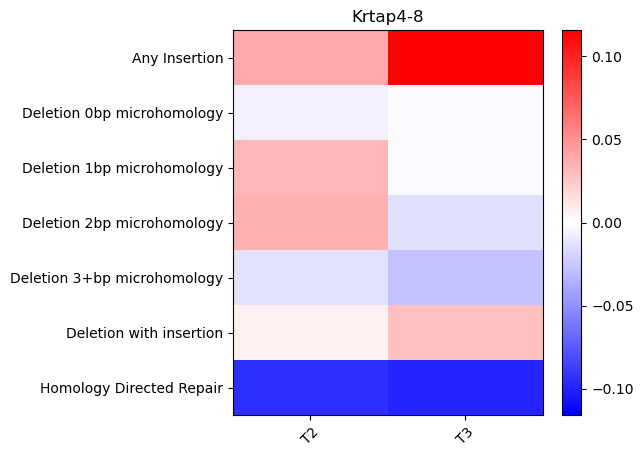

In [15]:
top_nonrepair_genes = outs[~outs["isGORepair"]].index.to_series()[:6]
for gene_to_vis in top_nonrepair_genes:
    gene_sample_frequency_change_heatmap(change_df, gene_to_vis)
    plt.show()